In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('income.csv')
print(df.shape)
df.head()

(22, 3)


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


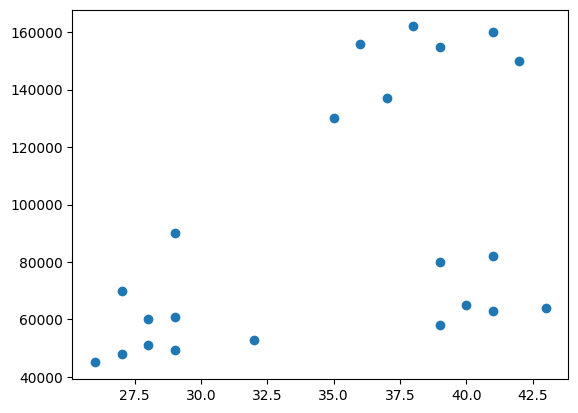

In [3]:
plt.scatter(df.Age,df['Income($)']);

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(df[['Age','Income($)']])

KMeans(n_clusters=3)

In [5]:
km.labels_

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
df['Cluster'] = km.labels_
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


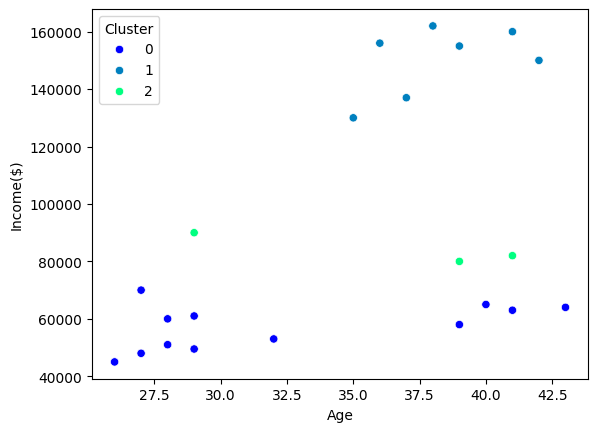

In [8]:
sns.scatterplot(df,x='Age',y='Income($)',hue='Cluster',palette='winter');

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(columns=['Age','Income($)'])

df_scaled[['Age','Income($)']] = scaler.fit_transform(df[['Age','Income($)']])

df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [11]:
km = KMeans(n_clusters=3)
km.fit(df_scaled[['Age','Income($)']])

KMeans(n_clusters=3)

In [12]:
df_scaled['Cluster'] = km.labels_

df_scaled.head()

,Age,Income($),Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2


In [17]:
centroid = km.cluster_centers_
centroid

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

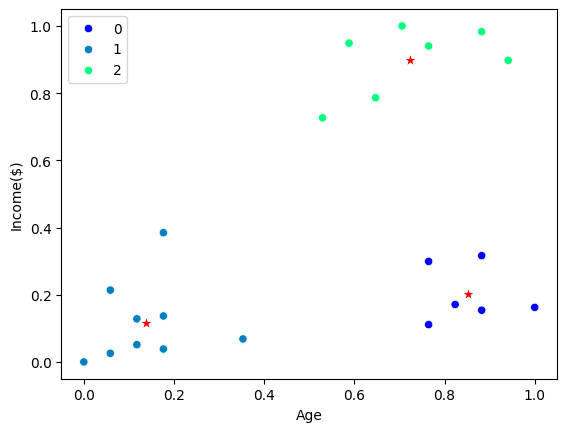

In [19]:
sns.scatterplot(df_scaled,x='Age',y='Income($)',hue='Cluster',palette='winter');
sns.scatterplot(x=centroid[:,0],y=centroid[:,1],color='red',marker='*',s=100);

In [21]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    cluster = km.fit(df_scaled[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3687734076440591,
 0.3417597180720834,
 0.21055478995472496,
 0.18868978151650503,
 0.14718536793995937,
 0.10907864282306068]

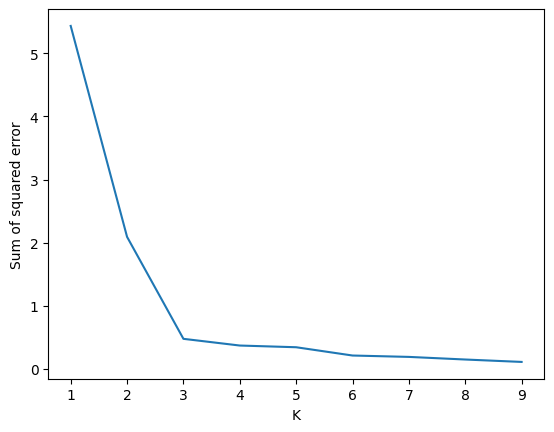

In [23]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show;